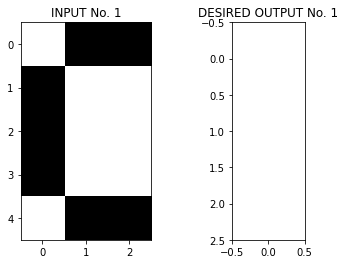

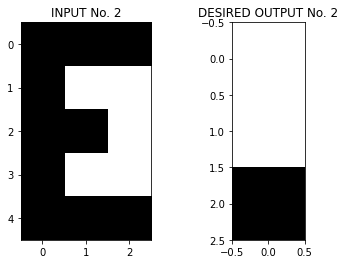

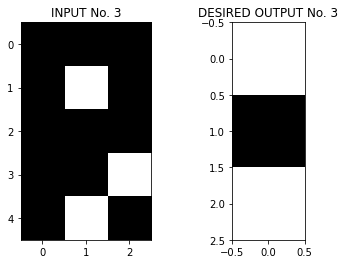

Forward Prediction


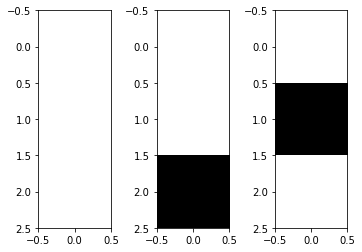

Backward Prediction


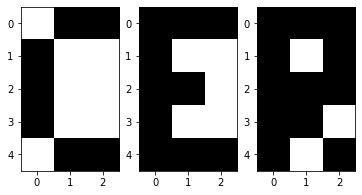

weights are equal to 
[[-1  1  1]
 [-3 -1 -1]
 [-3 -1 -1]
 [-3 -1 -1]
 [ 3  1  1]
 [ 1  3 -1]
 [-3 -1 -1]
 [-1  1  1]
 [ 1  3 -1]
 [-3 -1 -1]
 [ 1  3 -1]
 [ 3  1  1]
 [-1  1  1]
 [-1 -3  1]
 [-3 -1 -1]]


In [43]:
import matplotlib.pyplot as plt
import copy 
import numpy as np


def activation(input, output):
  if input == 0:
    return output
  else:
    return np.where(input > 0, np.where(input <= 0, input, 1.0), -1.0)

input = np.array([[[-1, 1, 1], [1, -1, -1], [1, -1, -1], [1, -1, -1], [-1, 1, 1]],
                    [[1, 1, 1], [1, -1, -1], [1, 1, -1], [1, -1, -1], [1, 1, 1]],
                    [[1, 1, 1], [1, -1, 1], [1, 1, 1], [1, 1, -1], [1, -1, 1]]])
input_ = np.array([input[0].reshape(15),input[1].reshape(15),input[2].reshape(15)])
desired = np.array([[ -1, -1, -1],[ -1, -1, 1],[ -1, 1, -1]])

for backwardOutput in range(3):
    plt.subplot(1, 2, 1)
    plt.imshow(input_[backwardOutput][:].reshape(5,3),cmap = "gray_r")
    plt.title("INPUT No. " + str(backwardOutput+1))
    plt.subplot(1, 2, 2)
    plt.imshow(desired[backwardOutput][:].reshape(3,1),cmap = "gray_r")
    plt.title("DESIRED OUTPUT No. " + str(backwardOutput+1))
    plt.show()

y = copy.copy(np.array(desired))
out = np.zeros((3,3))

backwardOutput = copy.copy(np.array(input_))
sum0 = np.zeros((3,15))

weights = np.matmul(np.transpose(input_), desired).reshape(3,15)
weights = weights.reshape(15,3)

def backwardPred(input_,desired, weights):
    converged = False
    for i in range(3):
      while not converged:
        for j in range(15):
          sum_s = 0
          for k in range(3):
            sum_s += weights[j,k] * input_[i,k] 
          sum0[i,j] = sum_s
          backwardOutput[i,j] = activation(sum0[i, j], backwardOutput[i,j])
          if desired[i,j] == backwardOutput[i,j]:
            converged = True
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(backwardOutput[i,:].reshape(5,3),cmap = "gray_r")
    plt.show()

def forwardPred(input_,desired, weights):

    converged = False
    for i in range(3):
      while not converged:
        for j in range(3):
          sum_ = 0
          for k in range(15):
            sum_ = sum_ + input_[i,k] * weights[k,j]
          out[i,j] = sum_
          y[i,j] = activation(out[i, j], y[i,j])
          if desired[i,j] == y[i,j]:
            converged = True
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(y[i,:].reshape(3,1),cmap = "gray_r")
    plt.show()

print('Forward Prediction')
forwardPred(input_,desired, weights)
print('Backward Prediction')
backwardPred(desired,input_, weights)
print('weights are equal to ')
print(weights)


In [136]:


import numpy as np
import matplotlib.pyplot as plt
sum = np.zeros((3,1))
    
def activation(x):
  if x == 0:
    return x
  else:
    return np.where(x > 0, np.where(x <= 0, x, 1.0), -1.0)

for i in range(100):

    input = np.array([[[-1, 1, 1], [1, -1, -1], [1, -1, -1], [1, -1, -1], [-1, 1, 1]],
                        [[1, 1, 1], [1, -1, -1], [1, 1, -1], [1, -1, -1], [1, 1, 1]],
                        [[1, 1, 1], [1, -1, 1], [1, 1, 1], [1, 1, -1], [1, -1, 1]]])
    input_ = np.array([input[0].reshape(15),input[1].reshape(15),input[2].reshape(15)])
    desired = np.array([[ -1, -1, -1],[ -1, -1, 1],[ -1, 1, -1]])
    
    weights = np.matmul(np.transpose(input_), desired).reshape(3,15)

    weights = weights.reshape(15,3)
    index = np.random.choice(15, 6, replace = False)

    for i in range(3):
      for j in range(len(index)):
        if input_[i, index[j]] == 1:
          input_[i, index[j]] = -1
        else:
          input_[i, index[j]] = 1

    out = np.array([[np.matmul(input_[0].reshape(1, 15), weights)],[np.matmul(input_[1].reshape(1, 15), weights)],[np.matmul(input_[2].reshape(1, 15), weights)]])
    out = out.reshape(3,3)
    for i in range (3):
      for j in range (0, 3):
        out[i,j] = activation(out[i,j])
        
    for i in range(3):
      if (out[i, :]==desired[i]).all():
        sum[i,0] += 1
        
    # for i in range(3):
    #     plt.subplot(1, 3, i+1)
    #     plt.imshow(out[i,:].reshape(3,1),cmap = "gray_r")
    # plt.show()

print('mean prediction accuracy of 1st input(C)',sum[0])
print('mean prediction accuracy of 2nd input(E)',sum[1])
print('mean prediction accuracy of 3rd input(R)',sum[2])
print('mean prediction accuracy of all inputs',np.sum(sum)/3)



mean prediction accuracy of 1st input(C) [41.]
mean prediction accuracy of 2nd input(E) [22.]
mean prediction accuracy of 3rd input(R) [11.]
mean prediction accuracy of all inputs 24.666666666666668


In [140]:


import numpy as np
import matplotlib.pyplot as plt
sum = np.zeros((3,1))
    
def activation(x):
  if x == 0:
    return x
  else:
    return np.where(x > 0, np.where(x <= 0, x, 1.0), -1.0)

for i in range(100):

    input = np.array([[[-1, 1, 1], [1, -1, -1], [1, -1, -1], [1, -1, -1], [-1, 1, 1]],
                        [[1, 1, 1], [1, -1, -1], [1, 1, -1], [1, -1, -1], [1, 1, 1]],
                        [[1, 1, 1], [1, -1, 1], [1, 1, 1], [1, 1, -1], [1, -1, 1]]])
    input_ = np.array([input[0].reshape(15),input[1].reshape(15),input[2].reshape(15)])
    desired = np.array([[ -1, -1, -1],[ -1, -1, 1],[ -1, 1, -1]])
    
    weights = np.matmul(np.transpose(input_), desired).reshape(3,15)

    weights = weights.reshape(15,3)
    index = np.random.choice(3, 1, replace = False)

    for i in range(3):
      for j in range(1):
        if desired[i, index[j]] == 1:
          desired[i, index[j]] = -1
        else:
          desired[i, index[j]] = 1
    # print(weights.T.shape, desired.shape[0])
    out = np.array([[np.matmul(desired[0].reshape(1, 3), weights.T)],[np.matmul(desired[1].reshape(1, 3), weights.T)],[np.matmul(desired[2].reshape(1, 3), weights.T)]])
    out = out.reshape(3,15)
    for i in range(3):
      for j in range(15):
        out[i,j] = activation(out[i,j])
        
    for i in range(3):
      if (out[i, :]==input_[i]).all():
        sum[i,0] += 1
        
    # for i in range(3):
    #     plt.subplot(1, 3, i+1)
    #     plt.imshow(out[i,:].reshape(5,3),cmap = "gray_r")
    # plt.show()

print('mean prediction accuracy of 1st input([ -1, -1, -1])',sum[0])
print('mean prediction accuracy of 2nd input([ -1, -1, 1])',sum[1])
print('mean prediction accuracy of 3rd input([ -1, 1, -1])',sum[2])
print('mean prediction accuracy of all inputs',np.sum(sum)/3)



mean prediction accuracy of 1st input([ -1, -1, -1]) [0.]
mean prediction accuracy of 2nd input([ -1, -1, 1]) [0.]
mean prediction accuracy of 3rd input([ -1, 1, -1]) [45.]
mean prediction accuracy of all inputs 15.0


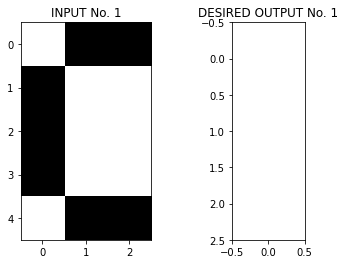

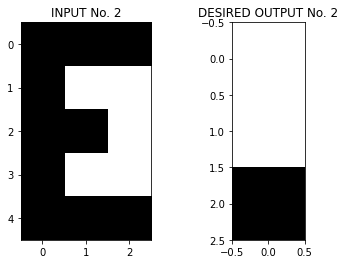

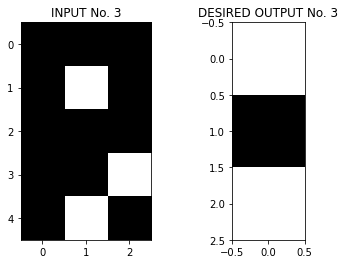

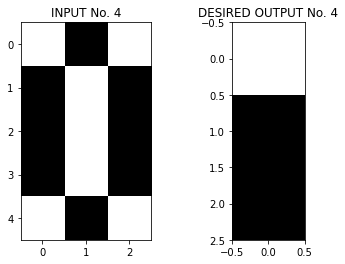

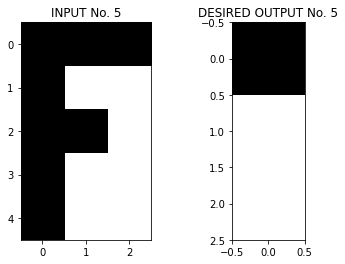

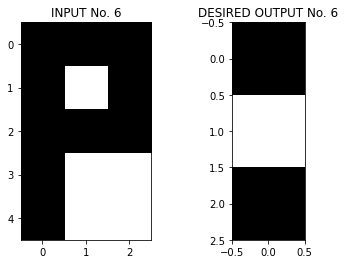

Forward Prediction


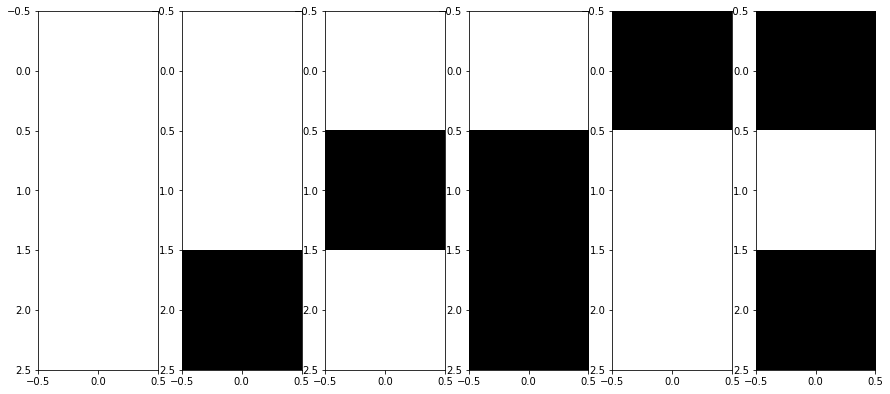

Backward Prediction


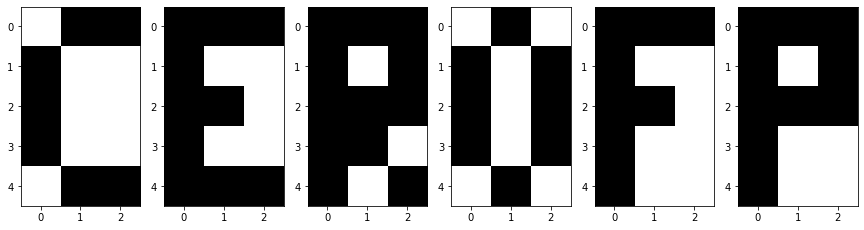

weights are equal to 
[[ 2 -2  0]
 [-2 -2  0]
 [ 0 -4 -2]
 [-2 -2  0]
 [ 2  2  0]
 [ 0  4  2]
 [-2 -2  0]
 [ 2 -2  0]
 [ 0  4  2]
 [-2 -2  0]
 [ 0  4 -2]
 [ 0  4  2]
 [ 2 -2  0]
 [-4  0  2]
 [-4  0 -2]]


In [148]:
import matplotlib.pyplot as plt
import copy 
import numpy as np


def activation(input, output):
  if input == 0:
    return output
  else:
    return np.where(input > 0, np.where(input <= 0, input, 1.0), -1.0)

input = np.array([[[-1, 1, 1], [1, -1, -1], [1, -1, -1], [1, -1, -1], [-1, 1, 1]],
                    [[1, 1, 1], [1, -1, -1], [1, 1, -1], [1, -1, -1], [1, 1, 1]],
                    [[1, 1, 1], [1, -1, 1], [1, 1, 1], [1, 1, -1], [1, -1, 1]],
                    [[-1, 1, -1], [1, -1, 1], [1, -1, 1], [1, -1, 1], [-1, 1, -1]],
                    [[1, 1, 1], [1, -1, -1], [1, 1, -1], [1, -1, -1], [1, -1, -1]],
                    [[1, 1, 1], [1, -1, 1], [1, 1, 1], [1, -1, -1], [1, -1, -1]]])
input_ = np.array([input[0].reshape(15),input[1].reshape(15),input[2].reshape(15),input[3].reshape(15),input[4].reshape(15),input[5].reshape(15)])
desired = np.array([[ -1, -1, -1],[ -1, -1, 1],[ -1, 1, -1],[ -1, 1, 1],[ 1, -1, -1],[ 1, -1, 1]])

for backwardOutput in range(6):
    plt.subplot(1, 2, 1)
    plt.imshow(input_[backwardOutput][:].reshape(5,3),cmap = "gray_r")
    plt.title("INPUT No. " + str(backwardOutput+1))
    plt.subplot(1, 2, 2)
    plt.imshow(desired[backwardOutput][:].reshape(3,1),cmap = "gray_r")
    plt.title("DESIRED OUTPUT No. " + str(backwardOutput+1))
    plt.show()

y = copy.copy(np.array(desired))
out = np.zeros((3,3))

backwardOutput = copy.copy(np.array(input_))
sum0 = np.zeros((3,15))

weights = np.matmul(np.transpose(input_), desired).reshape(3,15)
weights = weights.reshape(15,3)

def backwardPred(input_,desired, weights):
    converged = False
    for i in range(6):
      while not converged:
        for j in range(15):
          sum_s = 0
          for k in range(3):
            sum_s += weights[j,k] * input_[i,k] 
          sum0[i,j] = sum_s
          backwardOutput[i,j] = activation(sum0[i, j], backwardOutput[i,j])
          if desired[i,j] == backwardOutput[i,j]:
            converged = True
    plt.figure(figsize = (15,7))
    for i in range(6):
        plt.subplot(1, 6, i+1)
        plt.imshow(backwardOutput[i,:].reshape(5,3),cmap = "gray_r")
    plt.show()

def forwardPred(input_,desired, weights):

    converged = False
    for i in range(6):
      while not converged:
        for j in range(3):
          sum_ = 0
          for k in range(15):
            sum_ = sum_ + input_[i,k] * weights[k,j]
          out[i,j] = sum_
          y[i,j] = activation(out[i, j], y[i,j])
          if desired[i,j] == y[i,j]:
            converged = True
    plt.figure(figsize = (15,7))
    for i in range(6): 
        plt.subplot(1, 6, i+1)
        plt.imshow(y[i,:].reshape(3,1),cmap = "gray_r")
    plt.show()

print('Forward Prediction')
forwardPred(input_,desired, weights)
print('Backward Prediction')
backwardPred(desired,input_, weights)
print('weights are equal to ')
print(weights)


In [185]:
import numpy as np
import matplotlib.pyplot as plt
sum = np.zeros((6,1))
    
def activation(x):
  if x == 0:
    return x
  else:
    return np.where(x > 0, np.where(x <= 0, x, 1.0), -1.0)

for i in range(100):

    input = np.array([[[-1, 1, 1], [1, -1, -1], [1, -1, -1], [1, -1, -1], [-1, 1, 1]],
                        [[1, 1, 1], [1, -1, -1], [1, 1, -1], [1, -1, -1], [1, 1, 1]],
                        [[1, 1, 1], [1, -1, 1], [1, 1, 1], [1, 1, -1], [1, -1, 1]],
                        [[-1, 1, -1], [1, -1, 1], [1, -1, 1], [1, -1, 1], [-1, 1, -1]],
                        [[1, 1, 1], [1, -1, -1], [1, 1, -1], [1, -1, -1], [1, -1, -1]],
                        [[1, 1, 1], [1, -1, 1], [1, 1, 1], [1, -1, -1], [1, -1, -1]]])
    input_ = np.array([input[0].reshape(15),input[1].reshape(15),input[2].reshape(15),input[3].reshape(15),input[4].reshape(15),input[5].reshape(15)])
    desired = np.array([[ -1, -1, -1],[ -1, -1, 1],[ -1, 1, -1],[ -1, 1, 1],[ 1, -1, -1],[ 1, -1, 1]])
    
    weights = np.matmul(np.transpose(input_), desired).reshape(3,15)

    weights = weights.reshape(15,3)
    index = np.random.choice(15, 6, replace = False)

    for i in range(6):
      for j in range(len(index)):
        if input_[i, index[j]] == 1:
          input_[i, index[j]] = -1
        else:
          input_[i, index[j]] = 1

    out = np.array([[np.matmul(input_[0].reshape(1, 15), weights)],[np.matmul(input_[1].reshape(1, 15), weights)],[np.matmul(input_[2].reshape(1, 15), weights)],[np.matmul(input_[3].reshape(1, 15), weights)],[np.matmul(input_[4].reshape(1, 15), weights)],[np.matmul(input_[5].reshape(1, 15), weights)]])
    out = out.reshape(6,3)
    for i in range (6):
      for j in range (3):
        out[i,j] = activation(out[i,j])
        
    for i in range(6):
      if (out[i, :]==desired[i]).all():
        sum[i,0] += 1
        
    # for i in range(6):
    #     plt.subplot(1, 6, i+1)
    #     plt.imshow(out[i,:].reshape(3,1),cmap = "gray_r")
    # plt.show()

print('mean prediction accuracy of 1st input(C)',sum[0])
print('mean prediction accuracy of 2nd input(E)',sum[1])
print('mean prediction accuracy of 3rd input(R)',sum[2])
print('mean prediction accuracy of 4th input(O)',sum[3])
print('mean prediction accuracy of 5th input(F)',sum[4])
print('mean prediction accuracy of 6th input(P)',sum[5])
print('mean prediction accuracy of all inputs',np.sum(sum)/6)



mean prediction accuracy of 1st input(C) [21.]
mean prediction accuracy of 2nd input(E) [23.]
mean prediction accuracy of 3rd input(R) [8.]
mean prediction accuracy of 4th input(O) [22.]
mean prediction accuracy of 5th input(F) [20.]
mean prediction accuracy of 6th input(P) [14.]
mean prediction accuracy of all inputs 18.0


In [190]:


import numpy as np
import matplotlib.pyplot as plt
sum = np.zeros((6,1))
    
def activation(x):
  if x == 0:
    return x
  else:
    return np.where(x > 0, np.where(x <= 0, x, 1.0), -1.0)

for i in range(100):

    input = np.array([[[-1, 1, 1], [1, -1, -1], [1, -1, -1], [1, -1, -1], [-1, 1, 1]],
                        [[1, 1, 1], [1, -1, -1], [1, 1, -1], [1, -1, -1], [1, 1, 1]],
                        [[1, 1, 1], [1, -1, 1], [1, 1, 1], [1, 1, -1], [1, -1, 1]],
                        [[-1, 1, -1], [1, -1, 1], [1, -1, 1], [1, -1, 1], [-1, 1, -1]],
                        [[1, 1, 1], [1, -1, -1], [1, 1, -1], [1, -1, -1], [1, -1, -1]],
                        [[1, 1, 1], [1, -1, 1], [1, 1, 1], [1, -1, -1], [1, -1, -1]]])
    input_ = np.array([input[0].reshape(15),input[1].reshape(15),input[2].reshape(15),input[3].reshape(15),input[4].reshape(15),input[5].reshape(15)])
    desired = np.array([[ -1, -1, -1],[ -1, -1, 1],[ -1, 1, -1],[ -1, 1, 1],[ 1, -1, -1],[ 1, -1, 1]])
    
    weights = np.matmul(np.transpose(input_), desired).reshape(3,15)

    weights = weights.reshape(15,3)
    index = np.random.choice(3, 1, replace = False)

    for i in range(6):
      for j in range(1):
        if desired[i, index[j]] == 1:
          desired[i, index[j]] = -1
        else:
          desired[i, index[j]] = 1
    # print(weights.T.shape, desired.shape[0])
    out = np.array([[np.matmul(desired[0].reshape(1, 3), weights.T)],[np.matmul(desired[1].reshape(1, 3), weights.T)],[np.matmul(desired[2].reshape(1, 3), weights.T)],[np.matmul(desired[3].reshape(1, 3), weights.T)],[np.matmul(desired[4].reshape(1, 3), weights.T)],[np.matmul(desired[5].reshape(1, 3), weights.T)]])
    out = out.reshape(6,15)
    for i in range(6):
      for j in range(15):
        out[i,j] = activation(out[i,j])
        
    for i in range(6):
      if (out[i, :]==input_[i]).all():
        sum[i,0] += 1
        
    # for i in range(3):
    #     plt.subplot(1, 3, i+1)
    #     plt.imshow(out[i,:].reshape(5,3),cmap = "gray_r")
    # plt.show()

print('mean prediction accuracy of 1st input([ -1, -1, -1])',sum[0])
print('mean prediction accuracy of 2nd input([ -1, -1, 1])',sum[1])
print('mean prediction accuracy of 3rd input([ -1, 1, -1])',sum[2])
print('mean prediction accuracy of 4th input([ -1, 1, 1])',sum[3])
print('mean prediction accuracy of 5th input([ 1, -1, -1])',sum[4])
print('mean prediction accuracy of 6th input([ 1, -1, 1])',sum[5])
print('mean prediction accuracy of all inputs',np.sum(sum)/6)



mean prediction accuracy of 1st input([ -1, -1, -1]) [0.]
mean prediction accuracy of 2nd input([ -1, -1, 1]) [0.]
mean prediction accuracy of 3rd input([ -1, 1, -1]) [0.]
mean prediction accuracy of 4th input([ -1, 1, 1]) [0.]
mean prediction accuracy of 5th input([ 1, -1, -1]) [0.]
mean prediction accuracy of 6th input([ 1, -1, 1]) [0.]
mean prediction accuracy of all inputs 0.0
